# Thalamo-cortical neuron
# Analysis of Ca<sup>2+</sup> and voltage-dependent kinetics of the hyperpolarization-activated current

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import ticker
from matplotlib.colors import LogNorm

from PySONIC.neurons import getPointNeuron

### Functions

In [2]:
def plotIhKinetics(Vm, CCa, gatings, ylabel, cmap='viridis', fs=18, lw=2):
    
    mymap = cm.get_cmap(cmap)
    sm = plt.cm.ScalarMappable(cmap=mymap, norm=LogNorm(CCa.min(), CCa.max()))
    sm._A = []
    fig, ax = plt.subplots(figsize=(5, 3))
    for key in ['top', 'right']:
        ax.spines[key].set_visible(False)
    ax.set_xlabel('$V_m$ (mV)', fontsize=fs)
    ax.set_ylabel(ylabel, fontsize=fs)
    for c, gating, in zip(CCa, gatings):
        ax.plot(Vm, gating, linewidth=lw, c=sm.to_rgba(c))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(2))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(2))
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
    fig.add_axes()
    fig.colorbar(sm, cax=cbar_ax)
    for item in ax.get_xticklabels() + ax.get_yticklabels() + cbar_ax.get_yticklabels():
        item.set_fontsize(fs)
    cbar_ax.set_ylabel('$[Ca^{2+}_i]\ (uM)$', fontsize=fs)
    return fig

### Parameters

In [3]:
pneuron = getPointNeuron('TC')
Vm = np.linspace(-100, 50, 100)  # mV
CCa = np.logspace(np.log10(0.01), np.log10(10.0), 10)  # uM

# rate constants
alpha = pneuron.alphao(Vm)
beta = pneuron.betao(Vm)

# proportion of regulating factor in unbound state (-)
P0 = pneuron.k2 / (pneuron.k2 + pneuron.k1 * (CCa * 1e-6)**4)

# Extend to match dimensions (nCa, nV)
alpha = np.tile(alpha, (CCa.size, 1))
beta = np.tile(beta, (CCa.size, 1))
P0 = np.tile(P0, (Vm.size, 1)).T

### Open form

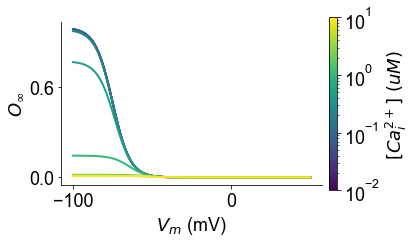

In [4]:
O = pneuron.k4 / (pneuron.k3 * (1 - P0) + pneuron.k4 * (1 + beta / alpha))
fig = plotIhKinetics(Vm, CCa, O, ylabel='$O_{\infty}$')

### Locked-open form

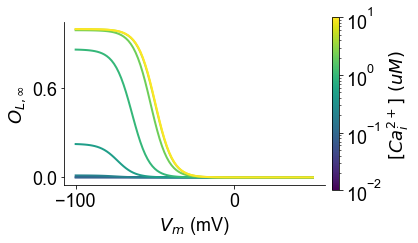

In [5]:
OL = (1 - O * (1 + beta / alpha))
fig = plotIhKinetics(Vm, CCa, OL, ylabel='$O_{L, \infty}$')

### Global gate activation

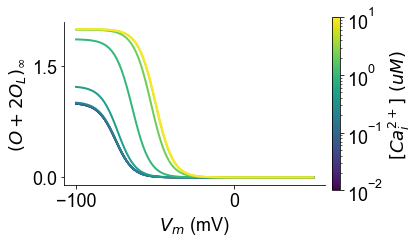

In [6]:
gHrel = O + 2 * OL
fig = plotIhKinetics(Vm, CCa, gHrel, ylabel='$(O + 2O_L)_{\infty}$')

**Ih steady-state activation increases with intracellular Calcium concentration**.